In [1]:
import pandas as pd #for dealing with csv import
import os # for joining paths and filenames sensibly
import numpy as np #for the population std
import glob # for finding csv data Çfiles

## Data processing

In [14]:
os.getcwd()

'C:\\Users\\David\\Documents\\GitHub\\OpenBrains\\Diana_analysis'

In [15]:
path_folder_all = 'C:\\Users\\David\\Desktop\\OpenBrains\\balanced_brains\\diana_all'

In [16]:
search_string=os.path.join(path_folder_all,'*.xlsx') 
files = glob.glob(search_string) #list of data files in the named location
files

['C:\\Users\\David\\Desktop\\OpenBrains\\balanced_brains\\diana_all\\Feedback experiment (1).xlsx',
 'C:\\Users\\David\\Desktop\\OpenBrains\\balanced_brains\\diana_all\\Feedback experiment (2).xlsx',
 'C:\\Users\\David\\Desktop\\OpenBrains\\balanced_brains\\diana_all\\Feedback experiment.xlsx',
 'C:\\Users\\David\\Desktop\\OpenBrains\\balanced_brains\\diana_all\\Feedback experiment5.xlsx',
 'C:\\Users\\David\\Desktop\\OpenBrains\\balanced_brains\\diana_all\\Feedback_experiment3.xlsx']

In [17]:
#Get summary dataframe

summary=[]

for filenum, filename in enumerate(files):
    print(filename)
    ##
    filepath =os.path.join(path_folder_all,filename) 
    xl = pd.ExcelFile(filepath)
    sheet_names = xl.sheet_names
    ##
    for idx, group in enumerate(sheet_names):

        df_gx = pd.read_excel(filepath, sheet_name=sheet_names[idx])

        if not df_gx.iloc[:,1].isnull().iloc[1]:

            for idx1, label in enumerate(['càstig', 'recompensa', 'guiatge']): ##each feedback type

                points = df_gx.iloc[1:, 1+idx1][~df_gx.iloc[1:, 1+idx1].isnull()].values ## remove the nan and convert to array

                print([points.sum(), np.round(points.mean(),2), points.shape[0], label, group ]) ##control mechanism

                summary.append([points.sum(), np.round(points.mean(),2), points.shape[0], label, group, filenum ])
            #
            
#
df = pd.DataFrame(summary)
df.columns=['sum', 'mean_points', '#thorws', 'feedback_type', 'group', 'filenum' ]    
            

C:\Users\David\Desktop\OpenBrains\balanced_brains\diana_all\Feedback experiment (1).xlsx
[500, 27.78, 18, 'càstig', 'G01']
[110, 5.0, 22, 'recompensa', 'G01']
[1750, 51.47, 34, 'guiatge', 'G01']
[780, 39.0, 20, 'càstig', 'G02']
[660, 30.0, 22, 'recompensa', 'G02']
[390, 22.94, 17, 'guiatge', 'G02']
[280, 23.33, 12, 'càstig', 'G03']
[260, 18.57, 14, 'recompensa', 'G03']
[170, 7.73, 22, 'guiatge', 'G03']
[1070, 46.52, 23, 'càstig', 'G04']
[860, 35.83, 24, 'recompensa', 'G04']
[840, 35.0, 24, 'guiatge', 'G04']
[880, 58.67, 15, 'càstig', 'G05']
[1100, 57.89, 19, 'recompensa', 'G05']
[880, 46.32, 19, 'guiatge', 'G05']
[150, 50.0, 3, 'càstig', 'G06']
[540, 41.54, 13, 'recompensa', 'G06']
[310, 44.29, 7, 'guiatge', 'G06']
[220, 44.0, 5, 'càstig', 'G07']
[240, 24.0, 10, 'recompensa', 'G07']
[300, 30.0, 10, 'guiatge', 'G07']
C:\Users\David\Desktop\OpenBrains\balanced_brains\diana_all\Feedback experiment (2).xlsx
[630, 30.0, 21, 'càstig', 'G01']
[1140, 67.06, 17, 'recompensa', 'G01']
[500, 29.41

## Plots

In [18]:
import matplotlib.pyplot as plt  # Matplotlib's pyplot: MATLAB-like syntax
import seaborn as sns
sns.set_context("talk")

In [19]:
c_guiatge =  '#e59500'
c_recompensa= 'aquamarine' # '#002642'
c_castig= 'indianred'  # '#840032'

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Eficiència')

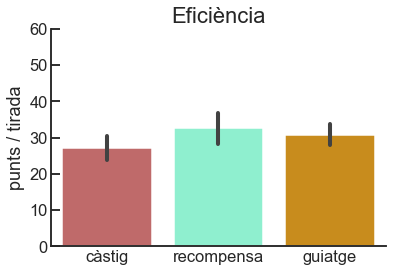

In [20]:
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,60)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


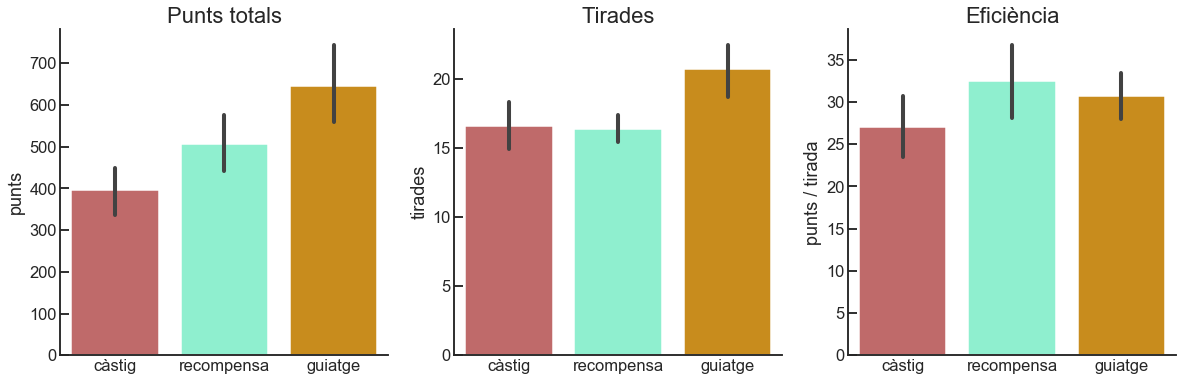

In [21]:
plt.figure(figsize=(20,6))

plt.subplot(131)
sns.barplot(data=df, x="feedback_type", y="sum", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts');
plt.title('Punts totals', fontsize=22)


plt.subplot(132)
sns.barplot(data=df, x="feedback_type", y="#thorws", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('tirades');
plt.title('Tirades', fontsize=22)


plt.subplot(133)
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22);


In [22]:
from linares_plot import *

No handles with labels found to put in legend.


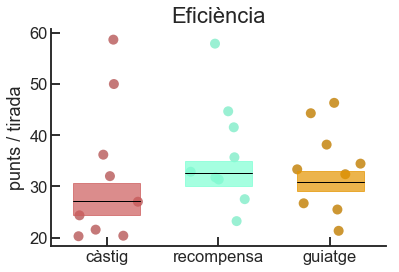

In [23]:
sns.set_context("talk")

linares_plot(x='feedback_type', y='mean_points', order=['càstig', 'recompensa', 'guiatge'], 
             df=df, palette=[c_castig, c_recompensa, c_guiatge], CI=0.68,  fill_box=True, by_subj=True, subj_col='group', 
             reps=500, alpha_box=0.7, alpha=0.9,  point_size=10, leg=False, sep_axis=False)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22);


## Stats

In [24]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [25]:
###### Anova model
mod = ols(formula='mean_points ~ feedback_type', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')
print( '                                 ')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df['mean_points'].values, groups=df['feedback_type'].values,  alpha=0.05)
print( tukey.summary()    )



                                 
                                 Anova Table
                     sum_sq    df         F    PR(>F)
feedback_type    372.635558   2.0  0.582224  0.561375
Residual       22080.718929  69.0       NaN       NaN
                                 
                                 
                                 
 Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2   meandiff  lower    upper  reject
---------------------------------------------------
 càstig  guiatge    3.6933  -8.6762  16.0629 False 
 càstig recompensa  5.4604  -6.9092   17.83  False 
guiatge recompensa  1.7671  -10.6025 14.1367 False 
---------------------------------------------------
